<div align="center">

# Ecole centrale de Lyon 

<img src="./logo.png" alt="EC" width="100"/>

## Confort et energie de l'habitat
### Rapport Reproductible

---

### Projet - Modèles dynamiques pour la gestion de l’énergie des bâtiments

---

</div>

**Élèves :**  
Yousra BARBOUCHA  
Samah CHAABI  

**Enseignant :**  
Ghiaus Christian 



# I. Introduction 

Ce projet a pour but de modéliser le comportement thermique d'un bâtiment. Par le biais de cette simulation, nous cherchons à comprendre comment divers facteurs tels que la conduction, la convection, le rayonnement et l'advection et la capacité thermique influencent les températures internes et la consommation d'énergie du bâtiment.

Le projet sera divisé en quatre principales affectations, où nous allons:

**Modéliser le bâtiment**: Cela inclut la création d'un plan détaillé du bâtiment, la sélection des matériaux, la définition des conditions limites et la construction d'un circuit thermique.

**Atteindre l'état stationnaire**: Nous utiliserons Python pour implémenter les matrices de modélisation et simuler l'état stationnaire du bâtiment, avant de comparer ces résultats avec les résultats obtenus via une représentation de l'espace d'état.

**Simuler la réponse à une étape**: Nous allons déterminer la dynamique temporelle du système en réponse à une entrée unique, en traçant les résultats pour analyse.

Répondre aux conditions météorologiques: Cette partie consistera à intégrer les données météorologiques réelles et à simuler la réponse du bâtiment aux changements climatiques, en tenant compte de facteurs comme l'irradiation solaire et les gains internes.

# II. Description du bâtiment et hypothéses

## II.1 Données météorologiques et localisation pour la modélisation thermique

Pour la modélisation thermique du bâtiment, nous avons opté pour le maintien des données météorologiques et des caractéristiques du site telles que fournies par le projet mis à disposition sur MOODLE.

Les données météorologiques sélectionnées correspondent à la ville de Lyon, en France, et ont été importées depuis la base de données [EnergyPlus™](https://energyplus.net/weather).

Les paramètres de localisation et les variables utilisées pour le calcul du rayonnement solaire sont les suivants :

Pente : 90° (ce qui indique des surfaces verticales)

Azimut : 0° (orientation plein sud)

Latitude : 45° (position géographique du site)

Albedo : 0.2 (réfléctivité de la surface du bâtiment)


Ces paramètres indiquent que le bâtiment est conçu avec une orientation sud, optimale pour l'exposition solaire dans l'hémisphère nord.


## II.2 Description du bâtiment pour la modélisation thermique


Le bâtiment choisi est un local cubique qui se compose de :
- Trois faces verticales bicouches (béton-isolant).
- Une face en béton sans isolation orientée plein sud.
- Le cube est posé directement sur le sol, ce qui crée un contact direct entre la face inférieure et le sol.

**Surfaces des murs :**

- Longueur de l'arête du cube : \( $l=3 \: \mathrm{m}$)
- Surface du mur en béton sans isolation : \(  $S_m=l^2$ )
- Surface totale des cinq murs (béton et isolation) : \($ S_c = S_i = 5 \times S_m$)

**Caractéristiques des matériaux :**

*Béton :*

- Conductivité thermique :  1 400 $ \ {W/m} \cdot \text{K} $
- Densité :  2300 $ {kg/m}^3 $
- Chaleur spécifique :  880 $ {J/kg} \cdot \text{K} $ 
- Épaisseur :  0.2 $\: \mathrm{m}$

*Isolation :*

- Conductivité thermique :  0.027 $ \ {W/m} \cdot \text{K} $
- Densité :  55.0 $ {kg/m}^3 $
- Chaleur spécifique : 1210 $ {J/kg} \cdot \text{K} $ 
- Épaisseur : 0.08 $\: \mathrm{m}$

**Propriétés radiatives :**

- Émissivité des ondes longues pour la surface du mur (béton) : \( $\epsilon_{\text{w}}$ = 0.85 \)
- Absorptivité des ondes courtes pour une surface lisse blanche : \($ \alpha_{\text{w}}$ = 0.25 \)
- Constante de bolzmann : \(  $ \sigma = 5.67 \times 10^{-8} \, \text{W/m}^2 \cdot \text{K}^4  $ \)


**Propriétés Thermique de l'air :**


*Air :* 


- Densité : 1.2 $ {kg/m}^3 $
- Capacité thermique : 1000 $ {J/kg} \cdot \text{K} $ 
- Coefficient de convection de l'air intérieur : 8 $ {W/m^2} \cdot \text{K} $ 
- Coefficient de convection de l'air Exterieur : 25 $ {W/m^2} \cdot \text{K} $ 




La figure descrivant le bâtiment est représentée si-dessous: 

![local](./Bâtiment.png)

>Figure 1. Pièce  ventilée  équipée d'un système CVC agissant comme un régulateur proportionnel.


## II.3 Schéma thermique 

## Réseau thermique

Les réseaux thermiques (ou circuits) sont des graphes orientés pondérés dans lesquels :
- les **nœuds**  représentent les températures, $\theta_i$, de points géométriques, surfaces ou volumes ;
- les branches orientées **branches** représentent les débits de flux de chaleur thermique, $q_j$, entre les nœuds de température.

![basic_TC](./figures/A01_Basic_thermal_circuit.svg)
> Figure 2. Réseau thermique de base.

Un réseau thermique comporte au moins une branche orientée, $q$, et un nœud, $\theta$.

Dans un nœud se trouvent une capacité thermique, $C_i$, (qui peut être positive ou nulle) et une source de débit de flux de chaleur, $\dot Q_i$, (qui peut être nulle).

Sur une branche, il y a une conductance, $G_j > 0$, (qui doit être strictement positive) et une source de température, $T_j$ (qui peut être nulle).
Pour le [modèle jouet](https://fr.m.wikipedia.org/wiki/Modèle_jouet) présenté à la Figure 1, le transfert de chaleur se fait :
- à travers les murs (béton et isolation),
- par ventilation,
- depuis des sources auxiliaires intérieures,
- depuis le système CVC.
Les sources sont :
- $T_o$ - température extérieure, °C;
-  $T_{i,sp}$ - température de consigne pour l'air intérieur, °C;
- $\Phi_o$ - rayonnement solaire absorbé par la surface extérieure du mur, W;
- $\Phi_i$ - rayonnement solaire absorbé par la surface intérieure du mur, W;
- $\dot{Q}_a$  - gains de chaleur auxiliaires (c.-à-d., occupants, appareils électriques, etc.), W;
- $\Phi_a$ - rayonnement solaire absorbé par le vitrage, W.
La figures ci-dessous représente le schéma thermique pour le bâtiment modélisé: 

![basic_TC](./schéma.drawio.svg)
> Figure 3. Schéma thermique de base.




### Conductances thermiques
#### Conduction
Les conductances 1, 2, 3, 4 ,8,9,10 du circuit thermique de la Figure 3 modélisent le transfert de chaleur par conduction. Les conductances de conduction, en W/K, sont de la forme :
$$G_{cd} = \frac{\lambda}{w}S$$
où :

- \( $\lambda \ $) - Conductivité thermique,  \ $ {W/m} \cdot \text{K} $;
- \( w \) - largeur du matériau, m;
- \( S \) - surface de la paroi, m².



#### Convection
Les conductances 0,6,7 et 8 modélisent le transfert de chaleur par [convection](https://fr.wikipedia.org/wiki/Convection_(transfert_de_chaleur)). Les conductances de convection, en W/K, sont de la forme :
$$ G_{cv} = hS $$
où :
- \( h \) - coefficient de convection, W/(m²⋅K);
- \( S \) - surface de la paroi, m².

 #### Transfert par Rayonnement
 Afin d'exprimer l'échange radiatif à longue onde en fonction des différences de température, une linéarisation de la différence des températures \($T_1^4 - T_2^4$\) peut être utilisée :

$$T_1^4 - T_2^4 = (T_1^2 + T_2^2)(T_1^2 - T_2^2) = (T_1^2 + T_2^2)(T_1 + T_2)(T_1 - T_2) = 4 \bar{T}^3 (T_1 - T_2)$$

où la température moyenne \($\bar{T}\$), mesurée en kelvin, est :

$$\bar{T} =\sqrt[3]{ \frac{(T_1^2 + T_2^2)(T_1 + T_2)}{4}}$$

L'évaluation de la température moyenne, \($\bar{T}\$), nécessite les valeurs des températures de surface, \(T_1\) et \(T_2\). Une première estimation peut être utilisée (et ensuite un processus itératif, pour une évaluation plus précise).

Après linéarisation, les conductances, en W/K, pour l'échange de chaleur radiatif sont :

$$G_{1} = 4 \sigma \bar{T}^3 \frac{\varepsilon_1}{1 - \varepsilon_1} S_1$$

$$G_{1,2} = 4 \sigma \bar{T}^3 F_{1,2} S_1 = 4 \sigma \bar{T}^3 F_{2,1} S_2$$

$$G_{2} = 4 \sigma \bar{T}^3 \frac{\varepsilon_2}{1 - \varepsilon_2} S_2$$

La conductance équivalente, en W/K, pour l'échange de chaleur radiatif à longue onde entre le mur et la fenêtre vitrée est :
$$G = \frac{1}{1/G_1 + 1/G_{1,2} + 1/G_2}$$



#### Advection

Le débit volumique de l'air, en m³/s, est :

$$\dot{V}_a = \frac{\mathrm{ACH}}{3600} V_a$$

où :
- $\mathrm{ACH}$ (Changements d'Air par Heure) est le taux d'infiltration d'air, 1/h ;
- $3600$ - nombre de secondes dans une heure, s/h ;
- $V_a$ - volume de l'air dans la zone thermique, m³.


#### Contrôleur proportionnel

Dans la représentation la plus simple, le système CVC peut être considéré comme un contrôleur proportionnel qui ajuste le débit de chaleur $q_{HVAC}$ afin de contrôler la température intérieure $\theta_i$ à sa valeur de consigne $T_{i,sp}$. Le débit de chaleur, en W, injecté par le système CVC dans l'espace contrôlé est :

$$ q_{HVAC} = K_p (T_{i, sp} - \theta_i)$$

où :
- $ K_p $ - est le gain proportionnel, W/K ;
- $ T_{i, sp} $ - température de consigne intérieure, °C (noté en majuscule car c'est une *variable indépendante, c'est-à-dire une entrée*) ;
- $\theta_i $ - température intérieure, °C (noté en minuscule car c'est une *variable dépendante, c'est-à-dire une sortie*).

Cette équation montre que le contrôleur proportionnel peut être modélisé par une source de température, $ T_{i, sp} $, et une conductance, $ K_p $. Si le gain du contrôleur tend vers :
- l'infini, $ K_p \rightarrow \infty $, alors le contrôleur est parfait, $\theta_i \rightarrow T_{i, sp}$.
- zéro, $ K_p \rightarrow 0 $, alors le contrôleur n'agit pas et le bâtiment est en régime libre, c'est-à-dire $ q_{HVAC} = 0 $.

*Note* : Respectant la convention de signe, le débit $ q_{HVAC}$ est orienté du potentiel inférieur vers le potentiel supérieur de la source de température $ T_{i,sp} $.


### Capacités thermiques
#### Murs
Les capacités thermiques du mur, en J/kg, sont :

$$C_w= m_w c_w= \rho_w c_w w_w S_w$$

où :
- $m_w  \rho_w w_w S_w $ est la masse du mur, kg ;

- $c_w$ - capacité thermique spécifique, J/(kg⋅K) ;

- $\rho_w$ - densité, kg/m³ ;

- $w_w$ - largeur du mur, m ;

- $S_w$ - surface du mur, m².


#### Air

De même, la capacité thermique de l'air, en J/kg, est :

$$C_a = m_a c_a = \rho_a c_a V_a$$

où :
- $ m_a = \rho_a V_a $  est la masse de l'air, kg ;
- $ \rho_a $ - densité de l'air, kg/m³ ;
- $ c_a $ - capacité thermique spécifique de l'air, J/(kg⋅K) ;
- $ V_a $ - volume de l'air dans la zone thermique, m³.


## II.4 Système d’équations algébriques différentielles (DAE)

L'analyse d'un circuit thermique, ou le problème direct, signifie trouver les températures aux nœuds, $\theta$, et les flux de chaleur sur les branches, \(q\), c'est-à-dire résoudre pour $\theta$ et \(q\) le système d'Équations Différentielles-Algébriques (DAE) :

$$\left\{\begin{array}{ll}
C \dot{\theta} = -(A^T G A) \theta + A^T G b + f\\ 
q = G (-A \theta + b)
\end{array}\right.$$

où :
- $\theta$ est le vecteur de température de taille $n_\theta$ égal au nombre de nœuds ;
- $q$ - vecteur de flux de chaleur de taille $n_q$ égal au nombre de branches ;
-$A$ - matrice d'incidence de taille $n_q$lignes et $n_{\theta}$ colonnes, où $n_q$ est le nombre de branches de flux et $n_{\theta}$ est le nombre de nœuds de température. Elle montre comment les nœuds de température sont connectés par des branches orientées de flux de chaleur :
    - si le flux *m* entre dans le nœud *n*, alors l'élément (*m, n*) de la matrice $A$ est 1, c'est-à-dire, $A_{m,n} = 1$ ;
    - si le flux *m* sort du nœud *n*, alors l'élément (*m, n*) de la matrice $ A $ est -1, c'est-à-dire, $ A_{m,n} = -1 $ ;
    - si le flux *m* n'est pas connecté au nœud *n*, alors l'élément (*m, n*) de la matrice $ A $est 0, c'est-à-dire, $A_{m,n} = 0$.

- $G$ - matrice diagonale de conductance de taille $n_q \times n_q$, où $n_q$ est le nombre de branches de flux : matrice diagonale contenant les conductances. Chaque branche $k$ doit contenir une conductance $0 < G_{k,k} < \infty $.

- $C$- matrice diagonale de capacité de taille $n_θ \times n_θ$, où $n_θ$ est le nombre de nœuds de température : matrice diagonale contenant les capacités. Si aucun capacité n'est présente dans le nœud *n*, alors $C_{n, n} = 0$.

- $b$ - vecteur source de température de taille $n_q$: si aucune source de température n'est présente sur la branche *m*, alors $b_m = 0$.

- $f$ - vecteur source de flux de chaleur de taille $n_θ$: si aucune source de flux de chaleur n'est présente dans le nœud *n*, alors $f_n = 0$.

La résolution est d'abord effectuée pour les températures, \(\theta\), en résolvant l'équation
$$C \dot{\theta} = -(A^T G A) \theta + A^T G b + f$$
qui, généralement, est un système d'équations différentielles-algébriques (DAE). Ensuite, les débits de flux de chaleur sont trouvés à partir de l'équation
$$q = G (-A \theta + b)$$


# II. Résolution numérique 

## Code

### Bibliothéque 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem

### Surfaces 

In [2]:
l = 3               # m length of the cubic room
Sg = l**2           # m² surface of the glass wall
Sc = Si = 5 * Sg    # m² surface of concrete & insulation of the 5 walls

### Caractéristiques 

In [3]:
air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/(kg·K)
# pd.DataFrame.from_dict(air, orient='index', columns=['air'])
pd.DataFrame(air, index=['Air'])

,Density,Specific heat
Air,1.2,1000


In [4]:
concrete = {'Conductivity': 1.400,
            'Density': 2300.0,
            'Specific heat': 880,
            'Width': 0.2,
            'Surface': 5 * l**2}

insulation = {'Conductivity': 0.027,
              'Density': 55.0,
              'Specific heat': 1210,
              'Width': 0.08,
              'Surface': 5 * l**2}

glass = {'Conductivity': 1.4,
         'Density': 2500,
         'Specific heat': 1210,
         'Width': 0.04,
         'Surface': l**2}

wall = pd.DataFrame.from_dict({'Layer_out': concrete,
                               'Layer_in': insulation,
                               'Glass': glass},
                              orient='index')
wall

,Conductivity,Density,Specific heat,Width,Surface
Layer_out,1.400,2300.0,880,0.20,45
Layer_in,0.027,55.0,1210,0.08,45
Glass,1.400,2500.0,1210,0.04,9


In [5]:
# radiative properties
ε_wLW = 0.85    # long wave emmisivity: wall surface (concrete)
ε_gLW = 0.90    # long wave emmisivity: glass pyrex
α_wSW = 0.25    # short wave absortivity: white smooth surface
α_gSW = 0.38    # short wave absortivity: reflective blue glass
τ_gSW = 0.30    # short wave transmitance: reflective blue glass

In [6]:
σ = 5.67e-8     # W/(m²⋅K⁴) Stefan-Bolzmann constant


In [7]:
h = pd.DataFrame([{'in': 8., 'out': 25}], index=['h'])  # W/(m²⋅K)

In [8]:
h

,in,out
h,8.0,25


### Conductance thermiques 

In [9]:
# conduction
G_cd = wall['Conductivity'] / wall['Width'] * wall['Surface']
pd.DataFrame(G_cd, columns=['Conductance'])

,Conductance
Layer_out,315.0000
Layer_in,15.1875
Glass,315.0000


In [10]:
# convection
Gw = h * wall['Surface'][0]     # wall
Gg = h * wall['Surface'][2]     # glass

In [11]:
# view factor wall-glass
Fwg = glass['Surface'] / concrete['Surface']

In [12]:
# long wave radiation
Tm = 20 + 273   # K, mean temp for radiative exchange

GLW1 = 4 * σ * Tm**3 * ε_wLW / (1 - ε_wLW) * wall['Surface']['Layer_in']
GLW12 = 4 * σ * Tm**3 * Fwg * wall['Surface']['Layer_in']
GLW2 = 4 * σ * Tm**3 * ε_gLW / (1 - ε_gLW) * wall['Surface']['Glass']

In [13]:
GLW = 1 / (1 / GLW1 + 1 / GLW12 + 1 / GLW2)

In [14]:
# ventilation flow rate
Va = l**3                   # m³, volume of air
ACH = 1                     # air changes per hour
Va_dot = ACH / 3600 * Va    # m³/s, air infiltration

In [15]:
# ventilation & advection
Gv = air['Density'] * air['Specific heat'] * Va_dot

In [16]:
# P-controler gain
Kp = 1e4            # almost perfect controller Kp -> ∞
Kp = 1e-3           # no controller Kp -> 0
Kp = 0

In [17]:
# glass: convection outdoor & conduction
Ggs = float(1 / (1 / Gg.loc['h', 'out'] + 1 / (2 * G_cd['Glass'])))

In [18]:
C = wall['Density'] * wall['Specific heat'] * wall['Surface'] * wall['Width']

In [19]:
C['Air'] = air['Density'] * air['Specific heat'] * Va
pd.DataFrame(C, columns=['Capacity'])

,Capacity
Layer_out,18216000.0
Layer_in,239580.0
Glass,1089000.0
Air,32400.0



### A : matrice d'incidence

La matrice d'incidence est :

$$A_{kl} = \begin{cases}
0 & \text{si la branche } q_k \text{ n'est pas connectée au nœud } \theta_l \\ 
+1 & \text{si la branche } q_k \text{ entre dans le nœud } \theta_l\\ 
-1 & \text{si la branche } q_k \text{ sort du nœud } \theta_l 
\end{cases}$$

Pour le circuit thermique montré dans la Figure 3,

$$ A = \begin{cases}
A_{0,0} = 1\\ 
A_{1,0} = -1, A_{1,1} = 1\\ 
...\\
A_{12,6} = 1\\
\end{cases}$$


In [20]:
A = np.zeros([13,9])       
A[0, 0] = 1                 
A[1, 0], A[1, 1] = -1, 1    
A[2, 1], A[2, 2] = -1, 1    
A[3, 2], A[3, 3] = -1, 1    
A[4, 3], A[4, 4] = -1, 1    
A[5, 4], A[5, 5] = -1, 1    
A[6, 4], A[6, 6] = -1, 1    
A[7, 5], A[7, 6] = -1, 1    
A[8,8]=1
A[9, 7],A[9, 8] = 1,-1                 
A[10, 5],A[10,7] = 1,-1
A[11,6]=1
A[12,6]=1
A.shape

(13, 9)

### G : matrice de conductance

La matrice de conductance du circuit thermique montré dans la Figure 3 est diagonale :

$$ G = \begin{cases}
G_{0,0} = G_{w,out} & \text{convection à la surface extérieure du mur (béton)}\\ 
G_{1,1} = G_{2,2} = 2G_{cd,Couche\,ext} & \text{conduction dans la demi-largeur de la couche externe}\\ 
G_{3,3} = G_{4,4} = 2G_{cd,Couche\,int} & \text{conduction dans la demi-largeur de la couche interne}\\ 
G_{5,5} = G_{LW} & \text{rayonnement à longue onde murs - fenêtre}\\
G_{6,6} = G_{w,in} & \text{convection à la surface intérieure du mur}\\
G_{7,7} = G_{w,out} & \text{convection à la surface extérieure du mur}\\ 
G_{8,8} = G_{9,9} = 2G_{cd,Couche\,ext} & \text{conduction dans la demi-largeur de la couche externe}\\ 
G_{10,10} = 2G_{cd,verre} & \text{conduction dans la demi-largeur du verre}\\
G_{11,11} = G_v & \text{advection par ventilation}\\
G_{12,12} = K_p & \text{gain du contrôleur proportionnel}
\end{cases}$$


In [21]:
G = np.diag(np.hstack(
    [Gw['out'],
     2 * G_cd['Layer_out'], 2 * G_cd['Layer_out'],
     2 * G_cd['Layer_in'], 2 * G_cd['Layer_in'],
     GLW,
     Gw['in'],
     Gw['in'],
     Gw['out'],
     2 * G_cd['Layer_out'], 2 * G_cd['Layer_out'],
     Gv,
     Kp]))

# np.set_printoptions(precision=3, threshold=16, suppress=True)
# pd.set_option("display.precision", 1)
# pd.DataFrame(G)
G.shape

(13, 13)

### C : matrice de capacité

La matrice de capacité du circuit thermique montré dans la Figure 3 est diagonale :

$$ C = \begin{cases}
C_{1,1} = C_{\text{Couche ext}} & \text{couche externe du mur}\\ 
C_{3,3} = C_{\text{Couche int}} & \text{couche interne du mur}\\ 
C_{6,6} = C_{\text{Air}} & \text{air de la pièce}\\ 
C_{7,7} = C_{\text{Couche ext}} & \text{couche externe du mur}\\
\end{cases}$$

Les capacités thermiques de l'air  peuvent être négligées ou non.


In [22]:
neglect_air_glass = False

if neglect_air_glass:
    C = np.diag([0, C['Layer_out'], 0, C['Layer_in'], 0, 0,
                 0, C['Layer_out'],0])
else:
    C = np.diag([0, C['Layer_out'], 0, C['Layer_in'], 0, 0,
                 C['Air'], C['Layer_out'],0])

# pd.set_option("display.precision", 3)
# pd.DataFrame(C)
C.shape 

(9, 9)

### b: vecteur de source de température 

In [23]:
b = np.zeros(13)        # branches
b[[0, 8,11,12]] = 1   # branches with temperature sources
print(f'b = ', b)

b =  [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.]


### f: vecteur flux de chaleur 


In [24]:
f = np.zeros(9)         # nodes
f[[0, 4, 6,8]] = 1     # nodes with heat-flow sources
print(f'f = ', f)

f =  [1. 0. 0. 0. 1. 0. 1. 0. 1.]


### y : vecteur de sortie

Le vecteur des sorties est $y$, de taille $n_{\theta}$, le nombre de nœuds . Les valeurs non nulles de $y$ indiquent les nœuds qui sont les sorties du modèle.

Pour le circuit thermique montré dans la Figure 3, si la sortie est la température de l'air intérieur, alors le vecteur de sortie est :

$$y = [\begin{matrix}
0  &0  &0  &0  &0  &0  &1 &0 &0 
\end{matrix}]^T$$

Dans le vecteur $y$, les nœuds pour lesquels les températures sont des sorties sont notés par \(1\) et les autres nœuds par \(0\).


In [25]:
y = np.zeros(9)         # nodes
y[[6]] = 1              # nodes (temperatures) of interest
print(f'y = ', y)

y =  [0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Représentation d'état
Le système d'équations différentielles-algébriques (DAE)

$$C \dot{\theta} = -(A^T G A) \theta + A^T G b + f$$

est transformé en représentation d'état :

$$\left\{\begin{array}{rr}
\dot{\theta}_s=A_s \theta_s + B_s u\\ 
y = C_s \theta_s + D_s u
\end{array}\right.$$

où :
- $\theta_s$ est le vecteur des variables d'état qui sont les températures des nœuds contenant des capacités ; les éléments sont dans le même ordre que dans le vecteur des températures, $\theta$ ; sa dimension, $\dim \theta_s$, est égale au nombre de capacités du réseau thermique ; pour le circuit présenté dans la Figure 3, $\theta_s = [\theta_1, \theta_3, \theta_6, \theta_7]^T$ ;

- $u = \begin{bmatrix} b_T \\ f_Q\end{bmatrix}$ - vecteur des entrées de dimension $\dim u$ égale au nombre de sources (de température, $b_T$, et de flux de chaleur, $f_Q$ du réseau thermique, où :

    - vecteur $b_T$ des éléments non nuls du vecteur $b$ des sources de température ; pour le circuit présenté dans la Figure 3, $b_T = [T_o, T_o, T_o, T_{i,sp}]^T$ correspond aux branches 0, 8, 11 et 12 ; 
    - vecteur $f_Q$ des éléments non nuls du vecteur $f$ des sources de flux ; pour le circuit présenté dans la Figure 3, $f_Q = [\Phi_o, \Phi_i, \dot{Q}_a, \Phi_o]^T$ correspond aux nœuds 0, 4, 6, et 8 ;
    
- $y$ - vecteur des sorties, un sous-ensemble du vecteur $\theta$ représentant les nœuds de température qui sont d'intérêt ; pour le circuit présenté dans la Figure 3, \(y = \theta_6\), la température intérieure.

- $A_s$- matrice d'état, de dimension $\dim A_s = \dim {\theta_s} \times \dim {\theta_s}$ ;

- $B_s$ - matrice des entrées, de dimension $\dim B_s = \dim {\theta_s} \times \dim u$;

- $C_s$ - matrice des sorties, de dimension \(\dim C_s = \dim y \times \dim {\theta_s}\) ;

- $D_s$ - matrice de transmission directe, de dimension \(\dim D_s = \dim y \times \dim u\).

*Note* : Le suffixe $s$ des matrices $A_s, B_s, C_s, D_s$ est utilisé pour différencier les matrices $A_s, C_s$ de la représentation d'état des matrices $A, C$ du système de DAE.


### Représentation des matrices pour les variables d'états 

In [26]:
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, C, b, f, y)
θs = ['θ1', 'θ3', 'θ6','θ7']       # state temperature nodes
uT = ['q0', 'q6', 'q8','q11']     # temperature sources
uQ = ['θ0', 'θ4','θ6','θ8']       # flow sources
u = uT + uQ                         # inputs
y = ['θ6']                          # output

(4, 22)
[ 0  8 11 12 13 17 19 21]


In [27]:
pd.DataFrame(As, index=θs, columns=θs)

,θ1,θ3,θ6,θ7
θ1,-0.000024,1.590791e-06,0.000000,0.000000
θ3,0.000121,-2.388477e-04,0.000110,0.000008
θ6,0.000000,8.127618e-04,-0.008585,0.007494
θ7,0.000000,1.049521e-07,0.000013,-0.000036


In [28]:
pd.DataFrame(Bs, index=θs, columns=u)

,q0,q6,q8,q11,θ0,θ4,θ6,θ8
θ1,0.000022,0.000000,0.000000,0.0,1.970654e-08,0.000000e+00,0.000000,0.000000e+00
θ3,0.000000,0.000000,0.000000,0.0,0.000000e+00,2.926536e-07,0.000000,0.000000e+00
θ6,0.000000,0.000000,0.000278,0.0,0.000000e+00,2.675759e-05,0.000031,0.000000e+00
θ7,0.000000,0.000022,0.000000,0.0,0.000000e+00,3.455214e-09,0.000000,1.970654e-08


In [29]:
pd.DataFrame(Cs, index=y, columns=θs)

,θ1,θ3,θ6,θ7
θ6,0.0,0.0,1.0,0.0


In [30]:
pd.DataFrame(Ds, index=y, columns=u)

,q0,q6,q8,q11,θ0,θ4,θ6,θ8
θ6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## I.V Etat statique: 


L'état stationnaire signifie que le terme $C \dot \theta = 0$ dans le système de DAE.

En état stationnaire, Considérons que :

- le contrôleur n'est pas actif, $K_p \rightarrow 0$,

- la température extérieure est $T_o = 10 \, \mathrm{^\circ C}$,

- la consigne de température intérieure est $T_{i,sp} = 20 \, \mathrm{^\circ C}$,

- tous les débits des sources sont nuls.



In [31]:
b = np.zeros(13)        # temperature sources
b[[0, 8, 11]] = 10      # outdoor temperature
b[[12]] = 20            # indoor set-point temperature

f = np.zeros(9)         # flow-rate sources

### I.V.1 État statique à partir d'équations algébriques différentielles (DAE)

La valeur de la température en état stationnaire est obtenue à partir du système de DAE en considérant que $C \dot{\theta} = 0$ :

$$\theta_{ss} = (A^T G A)^{-1}(A^T G b + f)$$

Pour les conditions mentionnées ci-dessus, en état stationnaire, toutes les températures \(\theta_0 ... \theta_7\), y compris la température de l'air intérieur $\theta_6$, sont égales à $T_o = 10 \, \mathrm{^\circ C}$.


In [32]:
θ = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)
print(f'θ = {θ} °C')

θ = [10. 10. 10. 10. 10. 10. 10. 10. 10.] °C


### I.V.2 État statique à partir d'équations des variables d'états: 

Le vecteur d'entrée \(u\) est obtenu en empilant les vecteurs $b_T$ et $f_Q$:

$$u = \begin{bmatrix} b_T \\ f_Q\end{bmatrix}$$

où :
- $b_T$ est un vecteur des éléments non nuls du vecteur $b$ des sources de température. Pour le circuit présenté dans la Figure 3, $b_T = [T_o, T_o, T_o, T_{i,sp}]^T$ correspondant aux branches 0, 8, 11 et 12, où :
    - $T_o$ - température extérieure, °C;
    - $T_{i,sp}$ - température de consigne pour l'air intérieur, °C.
    - $f_Q$ - vecteur des éléments non nuls du vecteur \(f\) des sources de flux. Pour le circuit présenté dans la Figure 3, $f_Q = [\Phi_o, \Phi_i, \dot{Q}_a, \Phi_o]^T$ correspondant aux nœuds 0, 4, 6 et 8, où :
    - $\Phi_o$ - rayonnement solaire absorbé par la surface extérieure du mur, W;
    - $\Phi_i$ - rayonnement solaire absorbé par la surface intérieure du mur, W;
    - $\dot{Q}_a$ - gains de chaleur auxiliaires (par exemple, occupants, appareils électriques, etc.), W;
    - $\Phi_a$ - rayonnement solaire absorbé par le verre, W.


In [33]:
bT = np.array([10, 10, 10, 20])     # [To, To, To, Tisp]
fQ = np.array([0, 0, 0, 0])         # [Φo, Φi, Qa, Φa]
u = np.hstack([bT, fQ])
print(f'u = {u}')

u = [10 10 10 20  0  0  0  0]



$$y_{ss} = (-C_s A_s^{-1} B_s + D_s) u$$

In [34]:
yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
print(f'yss = {yss} °C')

yss = [10.] °C


### I.V.2 Comparaison entre l'utilisation des équations des variables d'états et équations algébriques différentielles (DAE)

Pour comparer entre l'utilisation des deux systèmes d'equations on calcule l'erreur représentée ci-dessous: 


$$\varepsilon = \left | \theta_6 - y_{ss} \right |$$

In [35]:
print(f'Max error between DAE and state-space: \
{max(abs(θ[6] - yss)):.2e} °C')

Max error between DAE and state-space: 5.33e-15 °C


### Interprétation :Etat statique 

On comparant les résultats obtenus par le système d'Équations Différentielles-Algébriques (DAE) avec ceux obtenus pour la représentation en espace d'état, premièrement on vérifie que les températures aux nœuds sont identiques pour les deux méthodes lorsque le système atteint un état stationnaire.

Étant donné que la représentation en espace d'état et le système DAE ont été résolus (comme le suggère le code fourni), la comparaison impliquerait de soustraire la température stationnaire de l'air intérieur obtenue du système DAE $ \theta_{6} $ de la température stationnaire obtenue de la représentation en espace d'état également $ y_{ss} $, la différence devrait est  nulle ou proche de 5.33e-15 °C une valeur trés faible ce qui indique que les deux méthodes sont correctement mises en œuvre .


# V.  Simulation Dynamique 

## V.1 Pas du temps 


La condition pour la stabilité numérique de la méthode d'intégration d'Euler explicite est :

$$ \left| \lambda_i \delta_t + 1 \right| < 1, \text{ pour tous les } \lambda_i $$

c'est-à-dire que, dans le plan complexe, \( \lambda_i \delta_t \) est à l'intérieur d'un cercle de rayon 1 centré en \(-1, 0j\), où :
- \( \lambda_i \) sont les valeurs propres de la matrice \( A_s \),
- \( \delta_t \) est le pas de temps.

Pour des valeurs propres réelles positives, ce qui est le cas des réseaux thermiques, la condition ci-dessus devient :

$$ - \lambda \delta_t - 1 < 1, \text{ pour tous les } \lambda_i $$

ou

$$ 0 < \delta_t < -\frac{2}{\min(\lambda_i)} = 2 \times \min\left(-\frac{1}{\lambda_i}\right) = 2 \times \min(T_i) $$

où $T_i $ sont les constantes de temps, $ T_i = -\frac{1}{\lambda_i} $.


In [36]:
λ = np.linalg.eig(As)[0]    # eigenvalues of matrix As
λ = np.sort(λ)

In [37]:
print('Time constants:') 
print([f'{T:.2f} s' for T in -1 / λ])

print('\n2 x Time constants:') 
print([f'{T:.2f} s' for T in -2 / λ])

dtmax = 2 * min(-1. / λ)
print(f'\nMaximum time step: {dtmax:.2f} s = {dtmax / 60:.2f} min')

Time constants:
['116.18 s', '4351.35 s', '41901.32 s', '45032.54 s']

2 x Time constants:
['232.36 s', '8702.70 s', '83802.64 s', '90065.07 s']

Maximum time step: 232.36 s = 3.87 min


Dans cette simulation nous avons essayé de simuler les différents pas de temps afin d'étudier la stabilité des shémas. 

les pas de temps choisi doivent etre inférieur à : $\Delta t_{max} = \min (-2 / \lambda_i) $.

In [38]:
# time step
dt = np.floor(dtmax / 60) * 60   # s
dt=180
print(f'dt = {dt} s = {dt / 60:.0f} min')

dt = 180 s = 3 min


### Temps de réponse 
Le temps de réponse vaut 4 fois la constante du temps 

In [39]:
# settling time
time_const = np.array([int(x) for x in sorted(-1 / λ)])
print('4 * Time constants: \n', 4 * time_const, 's \n')

t_settle = 4 * max(-1 / λ)
print(f'Settling time: \
{t_settle:.0f} s = \
{t_settle / 60:.1f} min = \
{t_settle / (3600):.2f} h = \
{t_settle / (3600 * 24):.2f} days')

4 * Time constants: 
 [   464  17404 167604 180128] s 

Settling time: 180130 s = 3002.2 min = 50.04 h = 2.08 days



#### Réponse à un échelon
 la réponse dynamique du système est obtenue par une entrée en échelon.

#### Durée
La durée de la simulation doit être plus longue que le temps de réponse estimé. Cela nécessite un nombre correspondant de pas de temps dans le vecteur temporel.


In [40]:
# Step response
# -------------
# duration: next multiple of 3600 s that is larger than t_settle
duration = np.ceil(t_settle / 3600) * 3600
n = int(np.floor(duration / dt))    # number of time steps
t = np.arange(0, n * dt, dt)        # time vector for n time steps

print(f'Duration = {duration} s')
print(f'Number of time steps = {n}')
# pd.DataFrame(t, columns=['time'])

Duration = 183600.0 s
Number of time steps = 1020


#### Input vector
Dans la simulation dynamique, les entrées sont des séries temporelles,

Le vecteur d'entrée u de la représentation espace d'états est obtenu en empilant les vecteurs b_T et f_Q du système d'équations algébriques différentielles :

 $$u = \begin{bmatrix} b_T \\ f_Q\end{bmatrix}$$
où :
- le vecteur $b_T$ est constitué des éléments non nuls du vecteur $b$ des sources de température ; pour le circuit présenté dans la Figure 3,
 $$b = [\begin{matrix}
T_o &0  &0  &0  &0  &0  &0  &0  &T_o  &0 &0   &T_o  &T_{i,sp} 
 \end{matrix}]^T$$
 et 
$$b_T = [T_o, T_o, T_o, T_{i,sp}]^T$$
correspondant aux branches 0, 8, 10 et 11 ; 
- le vecteur $f_Q$ est constitué des éléments non nuls du vecteur $f$ des sources de flux ; pour le circuit présenté dans la Figure 3,

 $$f = [\begin{matrix}
\Phi_o &0  &0  &0  &\Phi_i  &0  &\dot{Q_a} &\Phi_0 
\end{matrix}]^T$$

 et

 $$f_Q = [\Phi_o, \Phi_i, \dot{Q}_a, \Phi_a]^T$$

correspondant aux nœuds 0, 4, 6 et 7.

Pour le circuit thermique montré dans la Figure 3, la série temporelle du vecteur d'entrée, $u = [u_0, u_1, ... , u_{n-1}]^T$, est :

 $$u = 
\begin{bmatrix}
T_o\\ 
T_o\\ 
T_o\\ 
T_{i,sp}\\ 
\Phi_o\\ 
\Phi_i\\ 
\dot{Q}_a\\ 
\Phi_a
\end{bmatrix}
= \begin{bmatrix}
T_{o(0)} & T_{o(1)}& ... & T_{o(n-1)}\\ 
T_{o(0)} & T_{o(1)}& ... & T_{o(n-1)}\ \\ 
T_{o(0)} & T_{o(1)}& ... & T_{o(n-1)}\ \\ 
T_{i,sp(0)} & T_{i,sp(1)}& ... & T_{i,sp(n-1)}\ \\ 
\Phi_{o(0)} & \Phi_{o(1)} & ... & \Phi_{o(n-1)}\\
\Phi_{i(0)} & \Phi_{i(1)} & ... & \Phi_{i(n-1)}\\ 
\dot{Q}_{a(0)} & \dot{Q}_{a(1)} & ... & \dot{Q}_{a(n-1)}\\ 
\Phi_{a(0)} & \Phi_{a(1)} & ... & \Phi_{a(n-1)}
\end{bmatrix}$$

 - $T_o = [T_{o(0)}, T_{o(1)}, ..., T_{o(n-1)}]$ est la série temporelle de la température extérieure à l'instant discret $t = [t_0, t_1, ... , t_{n-1}]$.

- $T_{i, sp} = [T_{{i, sp}(0)}, T_{{i, sp}(1)}, ..., T_{{i, sp}(n-1)}]$ est la série temporelle de la température de consigne intérieure à l'instant discret $t = [t_0, t_1, ... , t_{n-1}]$.

- $\Phi_o = [\Phi_{o(0)}, \Phi_{o(1)}, ..., \Phi_{o(n-1)}]$ est la série temporelle du rayonnement solaire absorbé par la surface extérieure du mur à l'instant discret $t = [t_0, t_1, ... , t_{n-1}]$.

- $\Phi_i = [\Phi_{i(0)}, \Phi_{i(1)}, ..., \Phi_{i(n-1)}]$ est la série temporelle du rayonnement solaire absorbé par la surface intérieure du mur à l'instant discret $t = [t_0, t_1, ... , t_{n-1}]$.

- $\dot{Q}_a = [\dot{Q}_{a(0)}, \dot{Q}_{a(1)}, ..., \dot{Q}_{a(n-1)}]$ est la série temporelle des gains de chaleur auxiliaires (c'est-à-dire, occupants, appareils électriques, etc.) à l'instant discret $t = [t_0, t_1, ... , t_{n-1}]$.

- $\Phi_a = [\Phi_{a(0)}, \Phi_{a(1)}, ..., \Phi_{a(n-1)}]$ est la série temporelle du rayonnement solaire absorbé par le verre à l'instant discret $t = [t_0, t_1, ... , t_{n-1}]$.                                                                                      Considérons une réponse à l'échelon dans les conditions utilisées pour l'analyse en régime permanent, c'est-à-dire $T_o = 10 \, \mathrm{^\circ C}$, $T_{i,sp} = 20 \, \mathrm{^\circ C}$, et toutes les sources de flux nulles (y compris le système HVAC).


In [41]:
# input vector
#u = np.zeros([8, n])                # u = [To To To Tisp Φo Φi Qa Φa]
#u[0:3, :] = 10 * np.ones([3, n])    # To = 10 for n time steps
#u[3, :] = 20 * np.ones([1, n])      # Tisp = 20 for n time steps

#pd.DataFrame(u)

# input vector
u = np.zeros([n, 8])                # u = [To To To Tisp Φo Φi Qa Φa]
u[:, 0:3] = 10 * np.ones([n, 3])    # To = 10 for n time steps
u[:, 3] = 20 * np.ones([n])         # Tisp = 20 for n time steps

pd.DataFrame(u)

,0,1,2,3,4,5,6,7
0,10.0,10.0,10.0,20.0,0.0,0.0,0.0,0.0
1,10.0,10.0,10.0,20.0,0.0,0.0,0.0,0.0
2,10.0,10.0,10.0,20.0,0.0,0.0,0.0,0.0
3,10.0,10.0,10.0,20.0,0.0,0.0,0.0,0.0
4,10.0,10.0,10.0,20.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1015,10.0,10.0,10.0,20.0,0.0,0.0,0.0,0.0
1016,10.0,10.0,10.0,20.0,0.0,0.0,0.0,0.0
1017,10.0,10.0,10.0,20.0,0.0,0.0,0.0,0.0
1018,10.0,10.0,10.0,20.0,0.0,0.0,0.0,0.0


#### Intégration dans le temps 

Le modèle en espace d'état

$$\left\{\begin{array}{rr}
\dot{\theta}_C=A_s \theta_C + B_s u\\ 
y = C_s \theta_C + D_s u
\end{array}\right.$$

est intégré dans le temps en utilisant la méthode d'Euler en avant (ou explicite) pour l'intégration numérique :

$$ \theta_{s,k+1} = (I + \Delta t A) \theta_{s,k} + \Delta t B u_k $$

et la méthode d'Euler en arrière (ou implicite) pour l'intégration numérique :

$$\theta_{s,k+1} = (I - \Delta t A)^{-1} ( \theta_{s,k} + \Delta t B u_k )$$

où \( k = 0, ... , n - 1 \).


In [42]:
# initial conditions
n_s = As.shape[0]                      # number of state variables
θ_exp = np.zeros([n_s, t.shape[0]])    # explicit Euler in time t
θ_imp = np.zeros([n_s, t.shape[0]])    # implicit Euler in time t

# time integration
I = np.eye(n_s)                        # identity matrix

for k in range(n - 1):
    θ_exp[:, k + 1] = (I + dt * As) @ θ_exp[:, k]\
        + dt * Bs @ u[k, :]
    θ_imp[:, k + 1] = np.linalg.inv(I - dt * As) @ (θ_imp[:, k]\
        + dt * Bs @ u[k, :])   

 Ensuite, nous obtenons les sorties

 $$ y = C_s \theta_s + D_s u$$
 
Pour les méthodes d'Euler explicite et implicite, respectivement.


In [43]:
# outputs
y_exp = Cs @ θ_exp + Ds @  u.T
y_imp = Cs @ θ_imp + Ds @  u.T

Les résultats de l'intégration d'Euler explicite et implicite sont pratiquement identiques les deux graphes ci-dessous sont interposés:

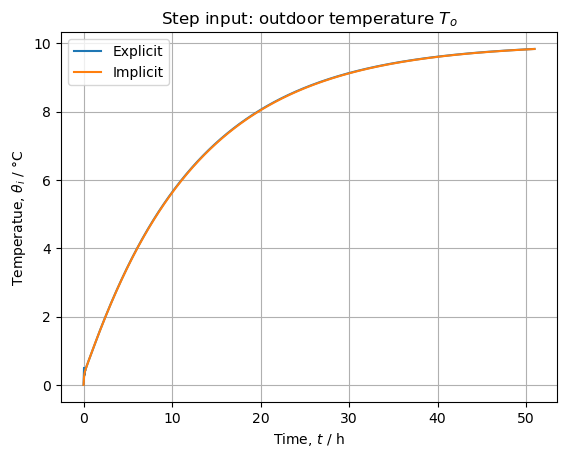

In [44]:
fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp.T, t / 3600, y_imp.T)
ax.set(xlabel='Time, $t$ / h',
       ylabel='Temperatue, $θ_i$ / °C',
       title='Step input: outdoor temperature $T_o$')
ax.legend(['Explicit', 'Implicit'])
ax.grid()
plt.show()

> Figure 4  . Réponse progressive à la température extérieure en utilisant la méthode d'Euler
implicite et explicite

La valeur de la température intérieure obtenue après le temps de stabilisation (10°C) est presque égale à la valeur obtenue en régime permanent (9,8397 °C).

In [45]:
print('Steady-state indoor temperature obtained with:')
print(f'- DAE model: {float(θ[6]):.4f} °C')
print(f'- state-space model: {float(yss):.4f} °C')
print(f'- steady-state response to step input: {float(y_exp[:, -2]):.4f} °C')

Steady-state indoor temperature obtained with:
- DAE model: 10.0000 °C
- state-space model: 10.0000 °C
- steady-state response to step input: 9.8397 °C


#### Interpretation: 

Pour des pas de temps faible nous observons la stabilité des deux schémas euleur explicite et implite par contre pour des pas de temps importants (400s) le shéma d'euleur explicite devient instable .

## V.2 Simulation avec les données météorologiques

#### Heure de début et de fin
La simulation sera effectuée de `start_date` à `end_date` indiqué au format `MM-DD HH:MM:SS` (mois, jour, heure:minute:seconde).

In [46]:
start_date = '02-01 12:00:00'
end_date = '02-07 18:00:00'

In [47]:
start_date = '2000-' + start_date
end_date = '2000-' + end_date
print(f'{start_date} \tstart date')
print(f'{end_date} \tend date')

2000-02-01 12:00:00 	start date
2000-02-07 18:00:00 	end date


### Entrées
##### Lire les données météorologiques

A partir des données météorologiques, nous sélectionnons : 

- la température horaire de l'air extérieur, °C ;
- l'irradiation solaire normale directe horaire, W/m² ;
- l'irradiation solaire horizontale diffuse horaire, W/m².

In [48]:
filename = './weather_data/FRA_Lyon.074810_IWEC.epw'
[data, meta] = dm4bem.read_epw(filename, coerce_year=None)
weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
del data

In [49]:
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather.loc[start_date:end_date]


#### Irradiance solaire sur les murs
Pour l'orientation de surface donnée par`slope`, `azimuth` et `latitude`, et l'`albedo` de la surface devant le mur, en utilisant les données météorologiques, nous pouvons calculer :
 - l'irradiance directe, W/m²,
 - l'irradiance diffuse, W/m²,
 - l'irradiance réfléchie, W/m²,

 pour l'irradiance solaire horaire sur une surface inclinée.

In [50]:
surface_orientation = {'slope': 90,
                       'azimuth': 0,
                       'latitude': 45}
albedo = 0.2
rad_surf = dm4bem.sol_rad_tilt_surf(
    weather, surface_orientation, albedo)
# pd.DataFrame(rad_surf)

In [51]:
rad_surf['Φtot'] = rad_surf.sum(axis=1)

#### Rééchantillonnage des données météorologiques

Les données météorologiques sont à l'intervalle de temps de 1 heure. Elles doivent être rééchantillonnées à l'intervalle de temps $\Delta t$ utilisé pour l'intégration numérique.

In [52]:
# resample weather data
data = pd.concat([weather['temp_air'], rad_surf['Φtot']], axis=1)
data = data.resample(str(dt) + 'S').interpolate(method='linear')
data = data.rename(columns={'temp_air': 'To'})
data = data.rename_axis('Time')
# pd.DataFrame(data)

##### Entrées 
 $T_{i,sp} = 20 \, \mathrm{^\circ C}$ 
 $\dot{Q}_a = 0 \, \mathrm{W}$

In [53]:
data['Ti'] = 20 * np.ones(data.shape[0])
data['Qa'] = 0 * np.ones(data.shape[0])
# pd.DataFrame(data)

##### Vecteur d'entrée dans le temps
L'entrée est formée par les vecteurs de séries temporelles des sources de température \(\left [ T_o, T_o ,T_o, T_{i,sp} \right ]^T\) et les vecteurs de séries temporelles des sources de flux de chaleur \(\left [ \Phi_o, \Phi_i, \dot{Q}_a, \Phi_a \right ]^T\) :

$$u = 
\begin{bmatrix}
T_o\\ 
T_o\\ 
T_o\\ 
T_{i,sp}\\ 
\Phi_o\\ 
\Phi_i\\ 
\dot{Q}_a\\ 
\Phi_a
\end{bmatrix}
= \begin{bmatrix}
T_{o(0)} & T_{o(1)}& ... & T_{o(n-1)}\\ 
T_{o(0)} & T_{o(1)}& ... & T_{o(n-1)}\\ 
T_{o(0)} & T_{o(1)}& ... & T_{o(n-1)}\\ 
T_{i,sp(0)} & T_{i,sp(1)}& ... & T_{i,sp(n-1)}\\ 
\Phi_{o(0)} & \Phi_{o(1)} & ... & \Phi_{o(n-1)}\\
\Phi_{i(0)} & \Phi_{i(1)} & ... & \Phi_{i(n-1)}\\ 
\dot{Q}_{a(0)} & \dot{Q}_{a(1)} & ... & \dot{Q}_{a(n-1)}\\ 
\Phi_{a(0)} & \Phi_{a(1)} & ... & \Phi_{a(n-1)}
\end{bmatrix}$$

où :

$T_o\$ : le vecteur de séries temporelles des températures extérieures (issues des données météorologiques), °C.

$T_{i,sp}$ : vecteur de séries temporelles des températures de consigne intérieures, °C.

$\Phi_o$ : vecteur de séries temporelles du rayonnement solaire (c'est-à-dire à courte longueur d'onde), en W, absorbé par la surface extérieure du mur :

$$\Phi_o = \alpha_{w,SW} S_w E_{tot}$$

où :

- $\alpha_{w,SW}$ est le coefficient d'absorption de la surface extérieure du mur à courte longueur d'onde, \(0 \leqslant \alpha_{w,SW} \leqslant 1\);
- $S_w$- surface du mur, m²;
- $E_{tot}$ - irradiation solaire totale sur le mur, W/m².

$\Phi_i$: vecteur de séries temporelles du rayonnement à courte longueur d'onde (c'est-à-dire solaire), en W, absorbé par les surfaces intérieures du mur :

$$\Phi_i = \tau_{g,SW}  \alpha_{w,SW} S_g E_{tot}$$

où :
- $\tau_{g,SW}$ est le coefficient de transmission du verre de la fenêtre, \(0 \leqslant \tau_{g,SW} \leqslant 1\);
-$\alpha_{w,SW}$ - coefficient d'absorption de la surface intérieure du mur à courte longueur d'onde, \(0 \leqslant \alpha_{w,SW} \leqslant 1\);
- $S_g$ - surface du verre de la fenêtre, m²;
- $E_{tot}$ - intensité totale du rayonnement solaire sur le mur, W/m².

$\dot{Q}_a$: vecteur temporel des flux de chaleur auxiliaires (des occupants, appareils électriques, etc.), W.

$\Phi_a$ : vecteur de séries temporelles du rayonnement à courte longueur d'onde (c'est-à-dire solaire), en W, absorbé par le verre de la fenêtre :

$$\Phi_a = \alpha_{g,SW} S_g E_{tot}$$

où :
- $\alpha_{g,SW}$ est le coefficient d'absorption

- $E_{tot}$ - total solar irradiation on the wall, W/m².

In [54]:
# input vector
To = data['To']
Ti = data['Ti']
Φo = α_wSW * wall['Surface']['Layer_out'] * data['Φtot']
Φi = τ_gSW * α_wSW * wall['Surface']['Glass'] * data['Φtot']
Qa = data['Qa']
Φa = α_gSW * wall['Surface']['Glass'] * data['Φtot']

u = pd.concat([To, To, To, Ti, Φo, Φi, Qa, Φa], axis=1)
u.columns.values[[4, 5, 7]] = ['Φo', 'Φi', 'Φa']
pd.DataFrame(u)

,To,To,To,Ti,Φo,Φi,Qa,Φa
Time,,,,,,,,
2000-02-01 12:00:00+01:00,10.00,10.00,10.00,20.0,803.2500,48.19500,0.0,244.1880
2000-02-01 12:03:00+01:00,10.05,10.05,10.05,20.0,802.4625,48.14775,0.0,243.9486
2000-02-01 12:06:00+01:00,10.10,10.10,10.10,20.0,801.6750,48.10050,0.0,243.7092
2000-02-01 12:09:00+01:00,10.15,10.15,10.15,20.0,800.8875,48.05325,0.0,243.4698
2000-02-01 12:12:00+01:00,10.20,10.20,10.20,20.0,800.1000,48.00600,0.0,243.2304
...,...,...,...,...,...,...,...,...
2000-02-07 17:48:00+01:00,4.36,4.36,4.36,20.0,15.7500,0.94500,0.0,4.7880
2000-02-07 17:51:00+01:00,4.32,4.32,4.32,20.0,11.8125,0.70875,0.0,3.5910
2000-02-07 17:54:00+01:00,4.28,4.28,4.28,20.0,7.8750,0.47250,0.0,2.3940


#### les conditions initiales:
La valeur initiale du vecteur d'état peut être zéro ou différente de zéro.

In [55]:
θ_exp = 20 * np.ones([As.shape[0], u.shape[0]])

### temps d'intégration :

#### Euler Explicit  ,

$$ \theta_{s,k+1} = (I + \Delta t A) \theta_{s,k} + \Delta t B u_k $$

where $k = 0, ... , n - 1$,

In [56]:
for k in range(u.shape[0] - 1):
    θ_exp[:, k + 1] = (I + dt * As) @ θ_exp[:, k]\
        + dt * Bs @ u.iloc[k, :]

Produit la variation temporelle de la variable d'état θ, à partir de laquelle nous obtenons la variation de la sortie (c'est-à-dire la température intérieure) :

$$y = C_s \theta_s + D_s u$$

et la variation du flux de chaleur du système HVAC ::

$$q_{HVAC} = K_p (T_{i,sp} - \theta_i) = K_p (T_{i,sp} - y)$$

où K_p est le gain du régulateur P et T_i_sp est le point de consigne du système HVAC pour la température intérieure..

In [57]:
y_exp = Cs @ θ_exp + Ds @ u.to_numpy().T
q_HVAC = Kp * (data['Ti'] - y_exp[0, :])

In [58]:
data['θi_exp'] = y_exp.T
data['q_HVAC'] = q_HVAC.T

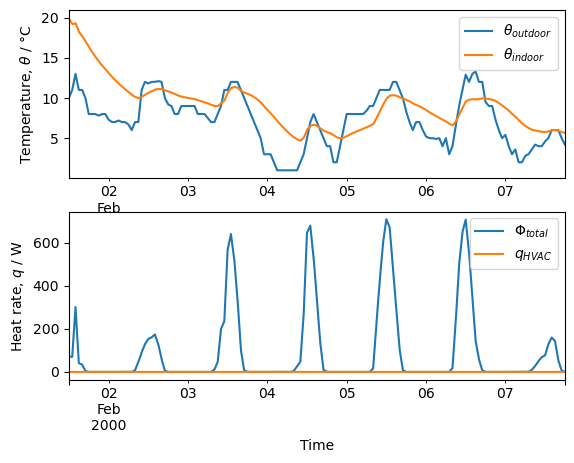

In [59]:
fig, axs = plt.subplots(2, 1)

data[['To', 'θi_exp']].plot(ax=axs[0],
                            xticks=[],
                            ylabel='Temperature, $θ$ / °C')
axs[0].legend(['$θ_{outdoor}$', '$θ_{indoor}$'],
              loc='upper right')

data[['Φtot', 'q_HVAC']].plot(ax=axs[1],
                              ylabel='Heat rate, $q$ / W')
axs[1].set(xlabel='Time')
axs[1].legend(['$Φ_{total}$', '$q_{HVAC}$'],
             loc='upper right')
plt.show()

> Figure 5. Simulation en marche libre avec les données météorologiques en utilisant la méthode d'intégration explicite d'Euler. a) Températures intérieure et extérieure. b) Débits de chaleur solaire et CVC.

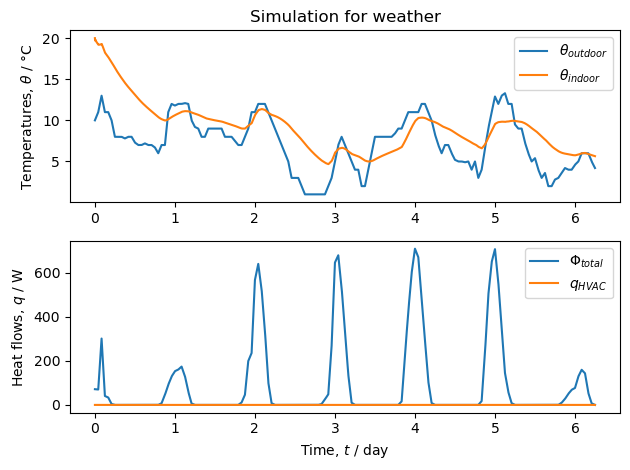

In [60]:
t = dt * np.arange(data.shape[0])   # time vector

fig, axs = plt.subplots(2, 1)
# plot outdoor and indoor temperature
axs[0].plot(t / 3600 / 24, data['To'], label='$θ_{outdoor}$')
axs[0].plot(t / 3600 / 24, y_exp[0, :], label='$θ_{indoor}$')
axs[0].set(ylabel='Temperatures, $θ$ / °C',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600 / 24, data['Φtot'], label='$Φ_{total}$')
axs[1].plot(t / 3600 / 24, q_HVAC, label='$q_{HVAC}$')
axs[1].set(xlabel='Time, $t$ / day',
           ylabel='Heat flows, $q$ / W')
axs[1].legend(loc='upper right')

fig.tight_layout()

> Figure 6. Simulation en marche libre avec les données météorologiques en utilisant la méthode d'intégration explicite d'Euler. a) Températures intérieure et extérieure. b) Débits de chaleur solaire et CVC.

# V.I Interprétaion des résultats :

Dans le graphique des températures, la température extérieure varie naturellement tout au long des jours, probablement en suivant les données météorologiques. La température intérieure semble suivre la tendance de la température extérieure mais avec une certaine inertie, ce qui suggère une isolation thermique du bâtiment qui atténue les variations extérieures.

Pour le graphique des flux de chaleur, les pics représentent probablement des moments où le système HVAC est actif, essayant de maintenir la température intérieure à une valeur de consigne. Lorsque le flux total chute à zéro, cela indique probablement que le besoin de chauffage ou de refroidissement est minimal en raison d'une température extérieure proche de la consigne intérieure.

Les pics dans le graphique du flux de chaleur du système HVAC montrent les périodes d'activation du système pour maintenir le confort intérieur. La hauteur des pics peut indiquer la quantité d'énergie nécessaire pour compenser les pertes de chaleur ou les gains non désirés à travers l'enveloppe du bâtiment.

Ces graphiques fournissent des informations précieuses sur les performances du bâtiment et la demande en énergie pour le chauffage ou la climatisation. Ils peuvent également aider à identifier les opportunités d'amélioration de l'efficacité énergétique, telles que l'amélioration de l'isolation ou la mise à niveau du système HVAC.
